# **Introduction**

In this project, we analyze a real dataset of over 100,000 medical appointments in Brazil to uncover patterns in patient no-shows. We'll explore whether demographic, health, and scheduling features can predict whether a patient will attend their appointment.

This type of analysis can help clinics reduce missed appointments, optimize scheduling, and improve healthcare access.

# **Dataset Overview**

Source: Kaggle – Medical Appointment No Shows

Size: 110,000+ rows

Key Columns:

* Gender, Age, Neighbourhood

* Hypertension, Diabetes, Alcoholism

* ScheduledDay, AppointmentDay, SMS_received

* No-show (target variable)

# **Step 1: Load Dataset**

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
# Load dataset
df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

# Preview
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# **Step 2: Understanding the Data**
* Convert dates to datetime format

* Create a new feature: days between scheduling and appointment

* Convert target variable to binary (1 = no-show, 0 = showed)

* Drop irrelevant columns

In [30]:
# Shape and info
print("Dataset shape:", df.shape)
df.info()

# Check missing values
df.isnull().sum()


Dataset shape: (110527, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# **Step 3: Clean the Data**

* Analyze distribution of no-shows

* Explore trends by age, gender, neighborhood

* Visualize correlations between variables

* Identify any outliers or imbalanced features

In [31]:
# Clean column names
df.columns = df.columns.str.strip()

# Check that date columns exist
print("Columns:", df.columns.tolist())

# Convert date columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors='coerce')

# Calculate days between appointment and scheduled day
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Drop irrelevant ID columns if they exist
for col in ['PatientId', 'AppointmentID']:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# View result
df.head()


Columns: ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [32]:
show=df["No-show"]=="No"
noshow=df["No-show"]=="Yes"
df[show].count(),df[noshow].count()

(Gender            88208
 ScheduledDay      88208
 AppointmentDay    88208
 Age               88208
 Neighbourhood     88208
 Scholarship       88208
 Hipertension      88208
 Diabetes          88208
 Alcoholism        88208
 Handcap           88208
 SMS_received      88208
 No-show           88208
 DaysBetween       88208
 dtype: int64,
 Gender            22319
 ScheduledDay      22319
 AppointmentDay    22319
 Age               22319
 Neighbourhood     22319
 Scholarship       22319
 Hipertension      22319
 Diabetes          22319
 Alcoholism        22319
 Handcap           22319
 SMS_received      22319
 No-show           22319
 DaysBetween       22319
 dtype: int64)

# **Step 4: Exploratory Data Analysis (EDA)**

* Use logistic regression to classify no-shows

* Train/test split

* Evaluate model performance (accuracy, confusion matrix, classification report)

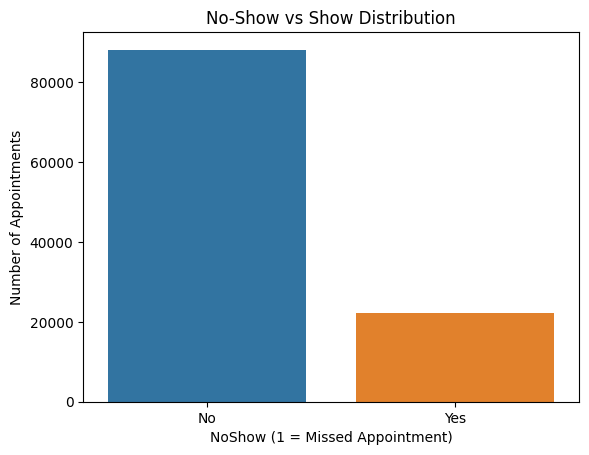

In [33]:
# Show vs No-show count
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='No-show', data=df)
plt.title('No-Show vs Show Distribution')
plt.xlabel('NoShow (1 = Missed Appointment)')
plt.ylabel('Number of Appointments')
plt.show()


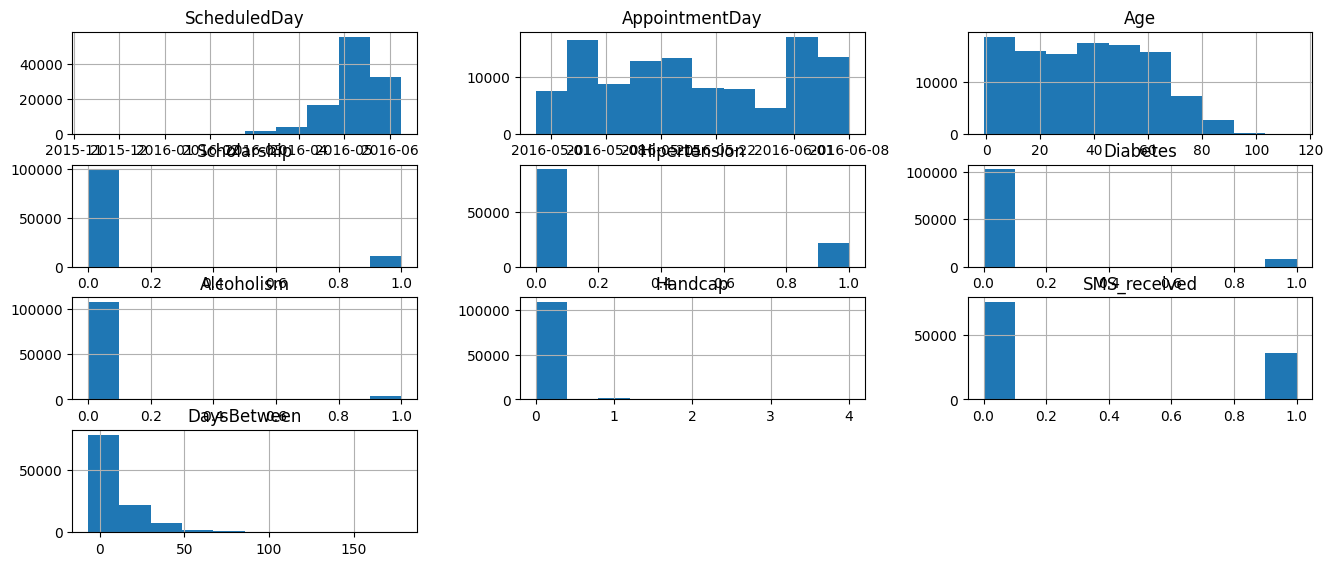

In [34]:
df.hist(figsize=(16,6.5));

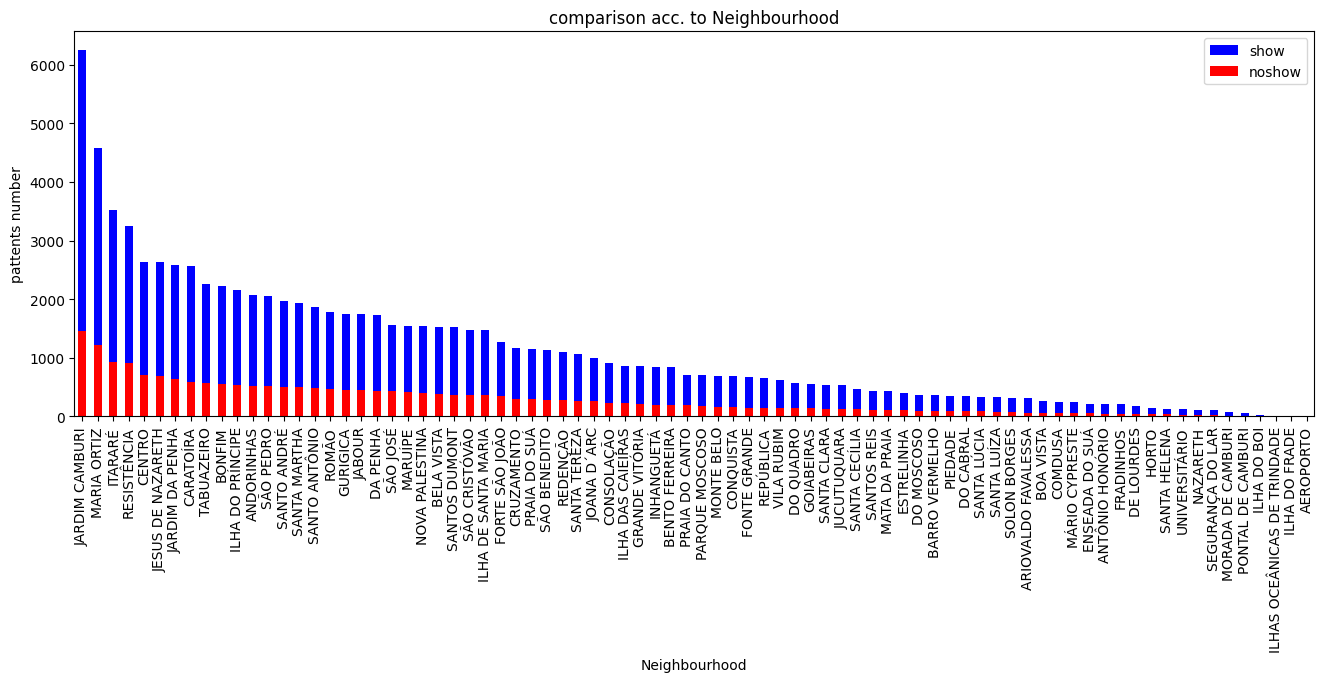

In [35]:
plt.figure(figsize=[16,5])
df.Neighbourhood[show].value_counts().plot(kind="bar",color="blue",label="show")
df.Neighbourhood[noshow].value_counts().plot(kind="bar",color="red",label="noshow")
plt.legend();
plt.title("comparison acc. to Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("pattents number");

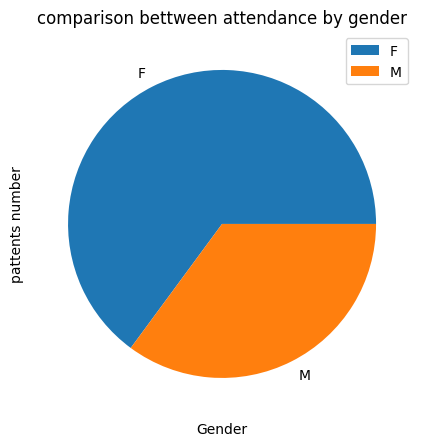

In [36]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,5])
    df[col_name][show].value_counts(normalize=True).plot(kind="pie",label="show")
    plt.legend();
    plt.title("comparison bettween attendance by gender")
    plt.xlabel("Gender")
    plt.ylabel("pattents number")
attendance(df,"Gender",show,noshow)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



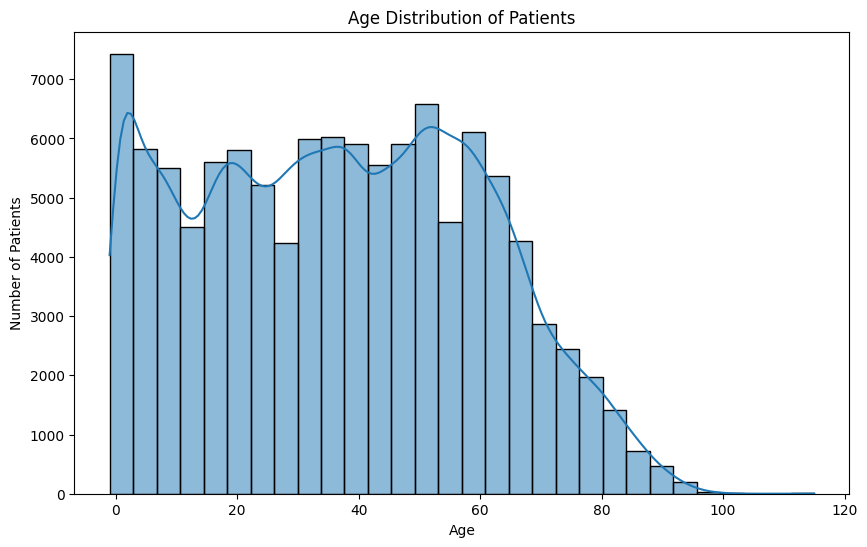

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

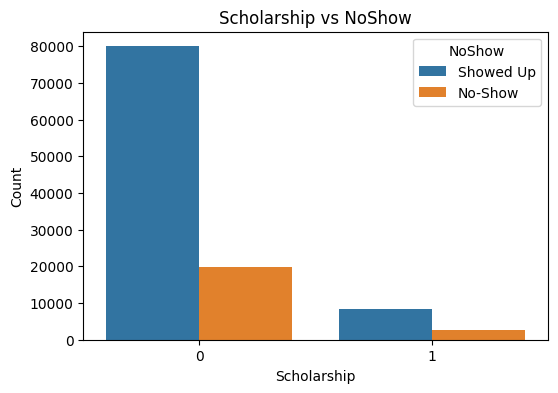

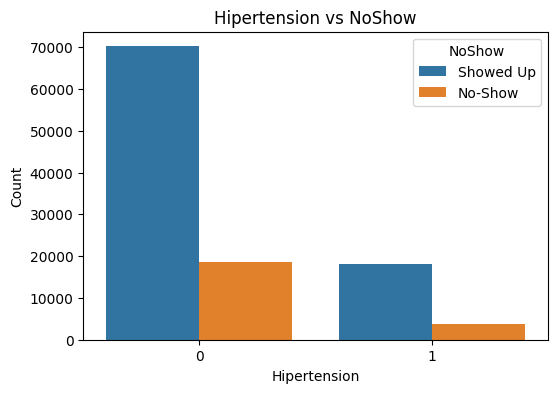

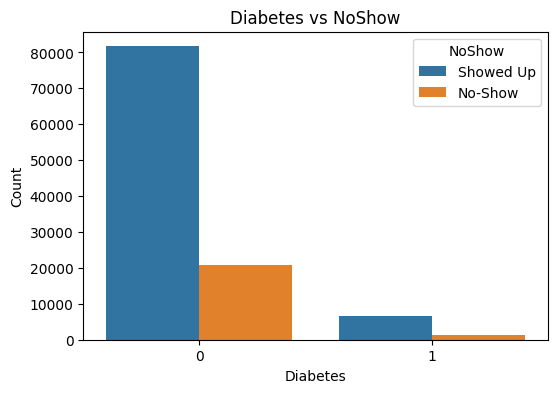

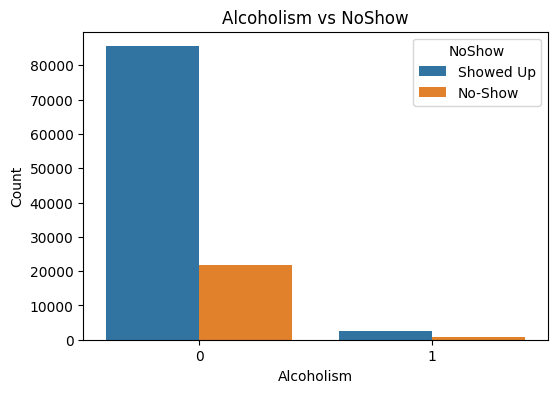

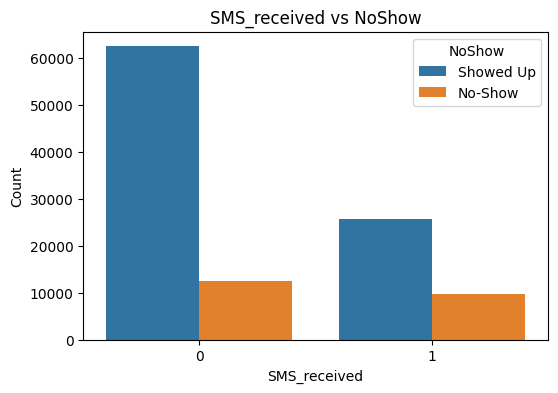

In [38]:
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='No-show', data=df)
    plt.title(f'{col} vs NoShow')
    plt.legend(title='NoShow', labels=['Showed Up', 'No-Show'])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [39]:
print(df.columns.tolist())

['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'DaysBetween']


# **Step 5: Build a Prediction Model**

* Build a simple logistic regression model to predict no-shows

* Evaluate how well it performs

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features and target
features = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'DaysBetween']
X = df[features]
y = df['No-show']

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Initialize model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [42]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7951234958834705
Confusion Matrix:
[[17503   166]
 [ 4363    74]]
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.99      0.89     17669
         Yes       0.31      0.02      0.03      4437

    accuracy                           0.80     22106
   macro avg       0.55      0.50      0.46     22106
weighted avg       0.70      0.80      0.71     22106



In [43]:
# Re-train Logistic Regression with class_weight='balanced'
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model again
model.fit(X_train, y_train)

# Make new predictions
y_pred = model.predict(X_test)

# Re-evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6652944901836605
Confusion Matrix:
[[12267  5402]
 [ 1997  2440]]
Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.69      0.77     17669
         Yes       0.31      0.55      0.40      4437

    accuracy                           0.67     22106
   macro avg       0.59      0.62      0.58     22106
weighted avg       0.75      0.67      0.69     22106



# **Insights & Conclusions**
In this project, I explored a real-world dataset of over 110,000 medical appointments in Brazil, aiming to predict whether a patient would show up.

**Key steps:**

* Performed data cleaning and feature engineering

* Conducted exploratory data analysis to uncover trends

* Built an initial logistic regression model achieving ~80% accuracy, but poor recall for no-shows

* Applied class weighting to address class imbalance, improving recall for no-show patients from 2% to 55%, with an overall accuracy of ~66%

**Insights:**

* Predicting no-shows is challenging due to class imbalance and subtle behavioral patterns

* Features like DaysBetween, SMS reminders, and comorbidities show some predictive value

* Addressing imbalance is crucial for building fair, useful healthcare models

**Next Steps:**

* Explore more advanced models (Random Forest, XGBoost)

* Tune hyperparameters for improved performance

* Use SMOTE or undersampling to further balance training data

* Deploy insights to help clinics proactively manage high-risk no-show appointments